In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('nue_crime_data.csv')
df.head()

,Dates,Times,Crime_types,Locations,LCDAs,population,Time of Day,day,Month,year,day_of_week,quarter,season,IsHoliday
0,2019-11-18,02:50:00,Fire Outbreak,Sala Street,Isolo,4814647.0,Midnight,Monday,November,2019,0,4,dry season,False
1,2019-11-18,02:55:00,Robbery,"21 Maiyaki street, Isokoko",Agege,4383983.0,Midnight,Monday,November,2019,0,4,dry season,False
2,2019-11-18,03:00:00,Robbery,43 Oduduwa Street. Iyana Oworo,Kosofe,3996193.0,Midnight,Monday,November,2019,0,4,dry season,False
3,2019-11-18,03:50:00,Robbery,Opewale Street,Agege,4383983.0,Midnight,Monday,November,2019,0,4,dry season,False
4,2019-11-18,21:45:00,Robbery,"Suliaman Street, Agunji",Eti-Osa East,4173713.0,Evening,Monday,November,2019,0,4,dry season,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dates        1428 non-null   object 
 1   Times        1420 non-null   object 
 2   Crime_types  1428 non-null   object 
 3   Locations    1395 non-null   object 
 4   LCDAs        1389 non-null   object 
 5   population   1392 non-null   float64
 6   Time of Day  1337 non-null   object 
 7   day          1428 non-null   object 
 8   Month        1428 non-null   object 
 9   year         1428 non-null   int64  
 10  day_of_week  1428 non-null   int64  
 11  quarter      1428 non-null   int64  
 12  season       1428 non-null   object 
 13  IsHoliday    1428 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 146.6+ KB


<AxesSubplot:>

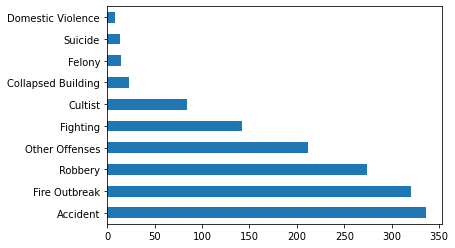

In [25]:
df.Crime_types.value_counts().plot.barh()

In [26]:

# Check for non-numeric values
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].str.isnumeric().any() == False:
            df = df[~df[col].isin(['NA', 'inf', '-inf'])]

# Convert the column to an integer
df['population'] = pd.to_numeric(df['population'], errors='coerce').fillna(0).astype(int)


In [27]:
df['population']=df['population'].astype(int)

In [28]:
# Split the dataset into two parts
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

train_data = df[:split_index]
test_data = df[split_index:]

# Save the two split datasets as CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [6]:
counter = df['Crime_types'].value_counts()
for k,v in counter.items():
    per = v / len(df['Crime_types']) * 100
    
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Class=Accident, n=336 (23.529%)
Class=Fire Outbreak, n=320 (22.409%)
Class=Robbery, n=274 (19.188%)
Class=Other Offenses, n=212 (14.846%)
Class=Fighting, n=142 (9.944%)
Class=Cultist, n=84 (5.882%)
Class=Collapsed Building, n=23 (1.611%)
Class=Felony, n=15 (1.050%)
Class=Suicide, n=14 (0.980%)
Class=Domestic Violence, n=8 (0.560%)


In [ ]:
df['c'] = le.fit_transform(df['class'])

In [7]:
df.dropna()

,Dates,Times,Crime_types,Locations,LCDAs,population,Time of Day,day,Month,year,day_of_week,quarter,season,IsHoliday
0,2019-11-18,02:50:00,Fire Outbreak,Sala Street,Isolo,4814647,Midnight,Monday,November,2019,0,4,dry season,False
1,2019-11-18,02:55:00,Robbery,"21 Maiyaki street, Isokoko",Agege,4383983,Midnight,Monday,November,2019,0,4,dry season,False
2,2019-11-18,03:00:00,Robbery,43 Oduduwa Street. Iyana Oworo,Kosofe,3996193,Midnight,Monday,November,2019,0,4,dry season,False
3,2019-11-18,03:50:00,Robbery,Opewale Street,Agege,4383983,Midnight,Monday,November,2019,0,4,dry season,False
4,2019-11-18,21:45:00,Robbery,"Suliaman Street, Agunji",Eti-Osa East,4173713,Evening,Monday,November,2019,0,4,dry season,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,2022-11-10,05:28:00,Other Offenses,Unilag water Front,Yaba,2671258,Midnight,Thursday,November,2022,3,4,dry season,False
1424,2022-11-16,02:00:00,Fire Outbreak,ile Oja opposite Abbattoir Police station,Agege,4383983,Midnight,Wednesday,November,2022,2,4,dry season,False
1425,2022-11-16,04:30:00,Fire Outbreak,AB Hotel Idimu,Alimosho,8686902,Midnight,Wednesday,November,2022,2,4,dry season,False
1426,2022-11-17,18:20:00,Fire Outbreak,Obalabi Street off Governors road ikotun,Alimosho,8686902,Afternoon,Thursday,November,2022,3,4,dry season,False


In [8]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier

In [7]:
oversample = SMOTE()

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Crime_types', 'IsHoliday'] = le.fit_transform(df['Crime_types'])

In [10]:
le_class = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for different classes:") 
print(le_class)

Sklearn label encoder results for different classes:
{'Accident': 0, 'Collapsed Building': 1, 'Cultist': 2, 'Domestic Violence': 3, 'Felony': 4, 'Fighting': 5, 'Fire Outbreak': 6, 'Other Offenses': 7, 'Robbery': 8, 'Suicide': 9}


In [11]:
X = df.drop('Crime_types', axis = 1)
y = df['Crime_types']

In [12]:
X = pd.get_dummies(X)

In [13]:
oversample = SMOTE()

In [14]:
X, y = oversample.fit_resample(X, y)

In [20]:
counter = df['Crime_types'].value_counts()
for k,v in counter.items():
    per = v / len(df['Crime_types']) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Class=Accident, n=336 (23.529%)
Class=Fire Outbreak, n=320 (22.409%)
Class=Robbery, n=274 (19.188%)
Class=Other Offenses, n=212 (14.846%)
Class=Fighting, n=142 (9.944%)
Class=Cultist, n=84 (5.882%)
Class=Collapsed Building, n=23 (1.611%)
Class=Felony, n=15 (1.050%)
Class=Suicide, n=14 (0.980%)
Class=Domestic Violence, n=8 (0.560%)


In [22]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

TypeError: %d format: a number is required, not str